In [179]:
# run stopwatch
from tools import Stopwatch
stopwatch = Stopwatch()
start = stopwatch.start()

### Load libraries, functions, palette, theme

In [348]:
%run _libraries.ipynb

In [359]:
%run _functions.ipynb

# Section I. Overview

## Load Saved Section if exists

## Load Data

In [182]:
data_raw = pd.read_csv('data/powerconsumption.csv')

In [183]:
data_raw.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


#### Transform names

In [184]:
data_raw = data_raw.rename(columns={
    'PowerConsumption_Zone1': 'target1',
    'PowerConsumption_Zone2': 'target2',
    'PowerConsumption_Zone3': 'target3'
})

In [185]:
data_raw.columns = map(str.lower, data_raw.columns)

#### Date to index

In [186]:
data_raw['datetime'] = pd.to_datetime(data_raw['datetime'])

In [187]:
data_raw = data_raw.set_index(data_raw['datetime'], drop=True)

In [188]:
data_raw.index.name = None

In [189]:
data_raw = data_raw.drop(columns='datetime')

#### Check duplicates

In [190]:
data_raw[data_raw.duplicated()]

,temperature,humidity,windspeed,generaldiffuseflows,diffuseflows,target1,target2,target3


## Data Split

In [191]:
data_raw.shape

(52416, 8)

In [192]:
train = data_raw.loc['2017-06': '2017-07'].copy()

In [193]:
test = data_raw.loc['2017-08'].copy()

In [194]:
train.shape

(8784, 8)

In [195]:
test.shape

(4464, 8)

## Explore

In [196]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2017-06-01 00:00:00 to 2017-07-31 23:50:00
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temperature          8784 non-null   float64
 1   humidity             8784 non-null   float64
 2   windspeed            8784 non-null   float64
 3   generaldiffuseflows  8784 non-null   float64
 4   diffuseflows         8784 non-null   float64
 5   target1              8784 non-null   float64
 6   target2              8784 non-null   float64
 7   target3              8784 non-null   float64
dtypes: float64(8)
memory usage: 617.6 KB


In [197]:
data_describe(train)

,Type,Count,Unique,NaN,Percentages
temperature,float64,8784,1827,0,0
humidity,float64,8784,3055,0,0
windspeed,float64,8784,97,0,0
generaldiffuseflows,float64,8784,3482,0,0
diffuseflows,float64,8784,3740,0,0
target1,float64,8784,4713,0,0
target2,float64,8784,5616,0,0
target3,float64,8784,5172,0,0


In [198]:
train.describe()

,temperature,humidity,windspeed,generaldiffuseflows,diffuseflows,target1,target2,target3
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,24.714696,62.984900,3.123768,286.859531,89.247039,35228.596506,22437.907415,24376.158916
std,4.183996,17.932169,2.336319,330.541919,122.416646,7172.617402,5032.504312,7413.013661
min,14.870000,11.340000,0.050000,0.011000,0.044000,19467.019870,9972.972973,10379.815380
25%,21.587500,50.077500,0.075000,0.084000,0.133000,29575.629140,18904.677758,18816.301253
50%,24.070000,65.555000,4.908000,106.550000,46.920000,35780.662250,22507.594940,24355.444090
75%,27.250000,78.225000,4.917000,598.050000,124.325000,40504.983390,26162.449010,28924.677955
max,40.010000,91.200000,4.937000,1055.000000,738.000000,51540.199340,37408.860760,47598.326360


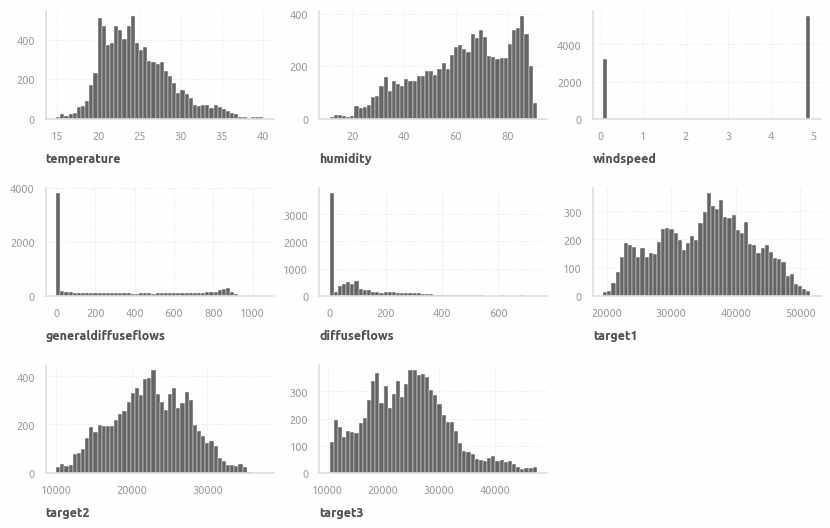

In [199]:
f = plot_gridplot(
    data=train,
    features=train.columns,
    figsize=(10,6),
    ncols=3,
    kind='hist',
    plot_shape='rectangle',
    hscale=1.6,
    histplot_kwargs={'bins': 50})

#### Variables lists

In [200]:
features = [
    'temperature', 'humidity', 'windspeed',
    'generaldiffuseflows', 'diffuseflows'
]

### Create datetime features

In [201]:
train['minutes_fr_bgn'] = 0 + np.arange(0, len(train)) * 10

In [202]:
train['minute'] = train.index.minute

In [203]:
train['hour'] = train.index.hour

In [204]:
train['day'] = train.index.day

In [205]:
train['weekday'] = train.index.weekday + 1

In [206]:
train['month'] = train.index.month

In [207]:
train["year_month"] = train.index.to_period('M')

In [208]:
train["year_day"] = train.index.to_period('d')

In [209]:
train

,temperature,humidity,windspeed,generaldiffuseflows,diffuseflows,target1,target2,target3,minutes_fr_bgn,minute,hour,day,weekday,month,year_month,year_day
2017-06-01 00:00:00,19.97,85.70,0.074,0.084,0.093,38145.69536,23414.96881,23229.04615,0,0,0,1,4,6,2017-06,2017-06-01
2017-06-01 00:10:00,19.90,85.70,0.072,0.073,0.119,37827.81457,23160.49896,22868.67692,10,10,0,1,4,6,2017-06,2017-06-01
2017-06-01 00:20:00,19.80,85.90,0.073,0.088,0.126,36200.26490,22965.90437,22638.27692,20,20,0,1,4,6,2017-06,2017-06-01
2017-06-01 00:30:00,19.82,85.90,0.074,0.062,0.159,34966.88742,22801.24740,22502.40000,30,30,0,1,4,6,2017-06,2017-06-01
2017-06-01 00:40:00,19.71,85.90,0.070,0.077,0.133,34699.86755,22546.77755,22555.56923,40,40,0,1,4,6,2017-06,2017-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-07-31 23:10:00,25.10,69.09,4.901,0.084,0.111,43407.30897,29608.86076,34294.89540,87790,10,23,31,1,7,2017-07,2017-07-31
2017-07-31 23:20:00,25.15,68.72,4.904,0.099,0.107,42507.90698,28955.69620,33939.41423,87800,20,23,31,1,7,2017-07,2017-07-31
2017-07-31 23:30:00,25.22,71.60,4.905,0.080,0.107,41659.53488,28378.48101,33385.10460,87810,30,23,31,1,7,2017-07,2017-07-31
2017-07-31 23:40:00,25.10,74.70,4.907,0.080,0.119,40843.05648,28070.88608,32806.69456,87820,40,23,31,1,7,2017-07,2017-07-31


### Explore data

##### Data by weeks

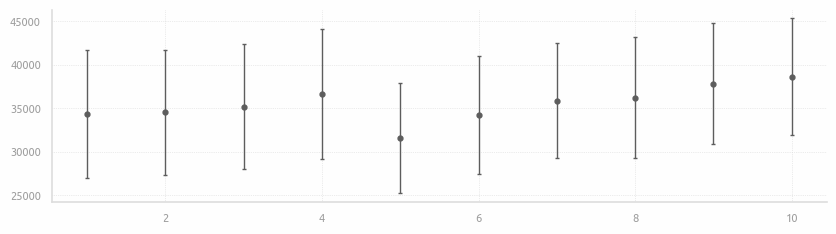

In [312]:
plt.errorbar(
    range(1, len(train.groupby(train.index.to_period('W')).mean())+1),
    train.groupby(train.index.to_period('W')).mean()['target1'],
    train.groupby(train.index.to_period('W'))['target1'].std(),
    ls='none',
    marker='o',
    lw=1,
    capsize=1.5
);

##### Weekly data

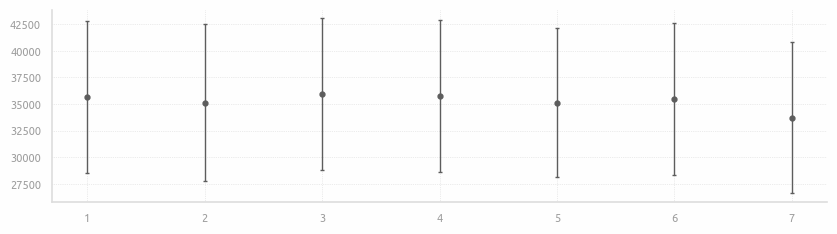

In [310]:
plt.errorbar(
    range(1, len(train.groupby('weekday').mean()['target1'])+1),
    train.groupby('weekday').mean()['target1'],
    train.groupby('weekday')['target1'].std(),
    ls='none',
    marker='o',
    lw=1,
    capsize=1.5
);

##### Daily data

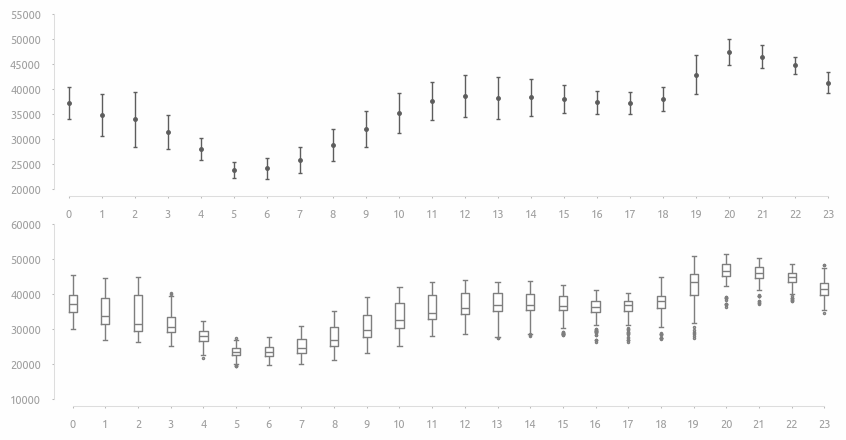

In [385]:
fig, ax = plt.subplots(2, 1, figsize=(10, 5))

ax[0].errorbar(
    range(len(train[train['weekday']==j].groupby('hour').mean())),
    train[train['weekday']==3].groupby('hour').mean()['target1'],
    train[train['weekday']==3].groupby('hour')['target1'].std(),
    ls='none',
    marker='o',
    markersize=2.5,
    lw=1,
    capsize=1.5
);
axis_rstyle(ax=ax[0], x_ticks=[0, 23, 1], margin=True)

sns.boxplot(
    y=train['target1'],
    x=train['hour'],
    width=0.25,
    fill=False,
    linewidth=1,
    color=palette[-3],
    flierprops=dict(markersize=1.5),
    ax=ax[1]
)
axis_rstyle(ax=ax[1], x_ticks=[0, 23, 1], margin=True)
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)

plt.show()

In [210]:
weekdays = np.sort(train['weekday'].unique())

In [211]:
ncols = 2
nrows = math.ceil(len(weekdays)/ncols)

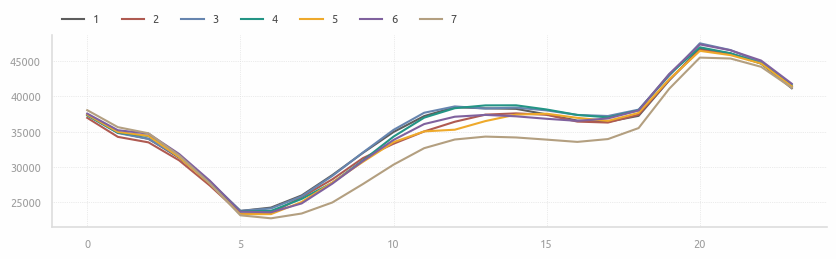

In [220]:
fig = plt.figure()
for i, j in enumerate(weekdays):
    plt.plot(
        train[train['weekday']==j].groupby('hour').mean().index,
        train[train['weekday']==j].groupby('hour').mean()['target1'],
        color=palette[i],
        label=j
    )
plt.legend(**legend_inline, ncols=len(weekdays))

<Axes: xlabel='target1', ylabel='Count'>

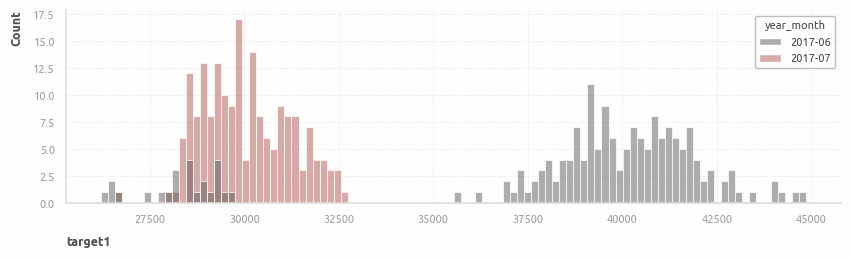

In [400]:
sns.histplot(
    x=train[train['hour']==2]['target1'],
    hue=train[train['hour']==2]['year_month'],
    bins=100
)

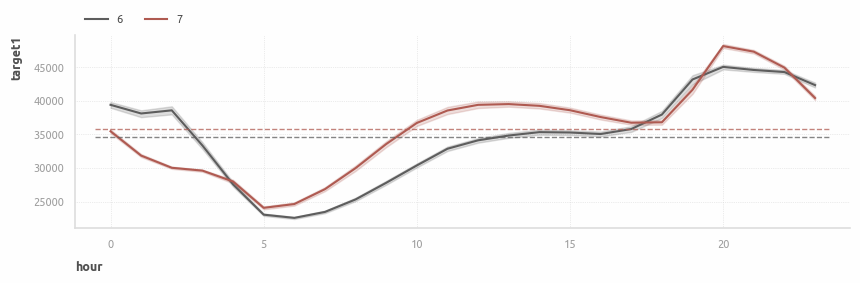

In [425]:
fig = plt.figure()
for i in range(6,8):
    sns.lineplot(
        x=train.loc[f'2017-{str(i).zfill(2)}']['hour'],
        y=train.loc[f'2017-{str(i).zfill(2)}']['target1'],
        label=i
    )
plt.axhline(
    train.loc[train['year_month']=='2017-06', 'target1'].mean(),
    0.025, 0.975, color=palette[0], lw=1, ls='--', alpha=0.75)
plt.axhline(
    train.loc[train['year_month']=='2017-07', 'target1'].mean(),
    0.025, 0.975, color=palette[1], lw=1, ls='--', alpha=0.75)
plt.legend(**legend_inline, ncols=len(train.loc[f'2017-{str(i).zfill(2)}']))
plt.show()

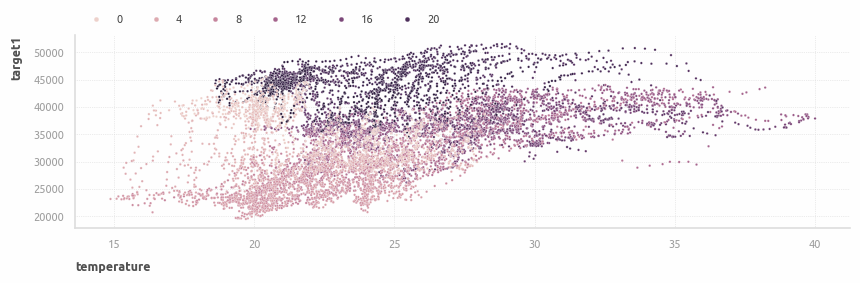

In [216]:
sns.scatterplot(
    x=train['temperature'],
    y=train['target1'],
    hue=train['hour'],
    **scatter
)
plt.legend(**legend_inline, ncols=len(train['hour']))

<Axes: xlabel='month', ylabel='target1'>

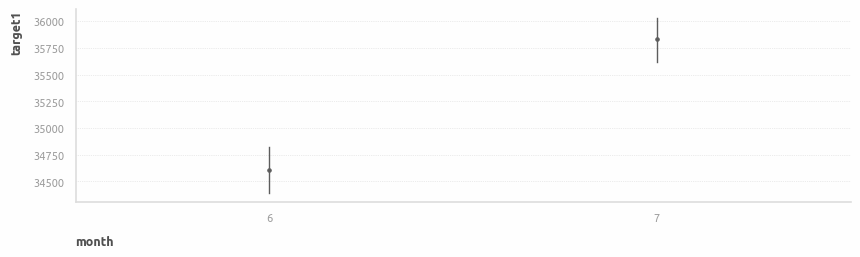

In [219]:
sns.pointplot(
    x=train['month'],
    y=train['target1'],
    ls='none',
    lw=1,
    errorbar=('ci')
)

### Save Session

### Execution time

In [222]:
print(f'Execution time: {stopwatch.stop(start)}')

Execution time: 0:00:22
